<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
import sys
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.3.0


In [5]:
!pip install matplotlib

In [1]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# The diabetes dataset
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Prepare input data

In [7]:
# input
X = data.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = data.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [8]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 47)

### Create the model's architecture

In [11]:
# Set up the model architecture
kr = Sequential()

In [12]:
# Add the first hidden layer
kr.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))

# Add the second hidden layer
kr.add(Dense(10, activation = 'relu'))

# Add the third hidden layer
kr.add(Dense(5, activation = 'relu'))

# Add the output layer
kr.add(Dense(1, activation = 'linear'))

In [13]:
print(kr.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [14]:
# Compile the model
kr.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

### Fit the training data

In [15]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [27]:
%%time
# Fit the model
history = kr.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 100,
    verbose = 0)

Wall time: 5.61 s


### Create predictions

In [17]:
predictions = kr.predict(X_test)

### Evaluate the model

In [18]:
# Calculate test MSE
score = kr.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 5ms/step - loss: 3413.6030 - mse: 3413.6030

Test loss: 3413.603027


In [19]:
score

[3413.60302734375, 3413.60302734375]

In [20]:
# Find RMSE
score[0] ** (1/2)

58.426047507458094

In [22]:
print("y_mean:", y.mean())
print("y_std:", y.std())
print("y_minimum:", y.min())
print("y_maximum:", y.max())


y_mean: 152.13348416289594
y_std: 77.00574586945044
y_minimum: 25.0
y_maximum: 346.0


### Visualisation of cost

In [23]:
history.history

{'loss': [31684.322265625,
  31633.439453125,
  31558.94140625,
  31446.828125,
  31277.892578125,
  31036.658203125,
  30708.59375,
  30271.953125,
  29695.43359375,
  28966.33203125,
  28069.646484375,
  26949.560546875,
  25600.013671875,
  24066.076171875,
  22365.4765625,
  20509.97265625,
  18482.896484375,
  16453.28125,
  14305.7724609375,
  12262.87109375,
  10426.80859375,
  8786.91796875,
  7496.03564453125,
  6446.31884765625,
  5662.671875,
  5080.2470703125,
  4719.86474609375,
  4528.5341796875,
  4359.5185546875,
  4257.5498046875,
  4204.42529296875,
  4162.6044921875,
  4129.25634765625,
  4096.91796875,
  4067.468994140625,
  4036.4892578125,
  4009.078369140625,
  3982.563232421875,
  3966.03759765625,
  3933.636962890625,
  3910.98193359375,
  3884.2666015625,
  3866.7470703125,
  3846.529296875,
  3821.64892578125,
  3805.24951171875,
  3782.964111328125,
  3762.90234375,
  3747.34326171875,
  3725.527587890625,
  3716.318359375,
  3690.2841796875,
  3673.78637695

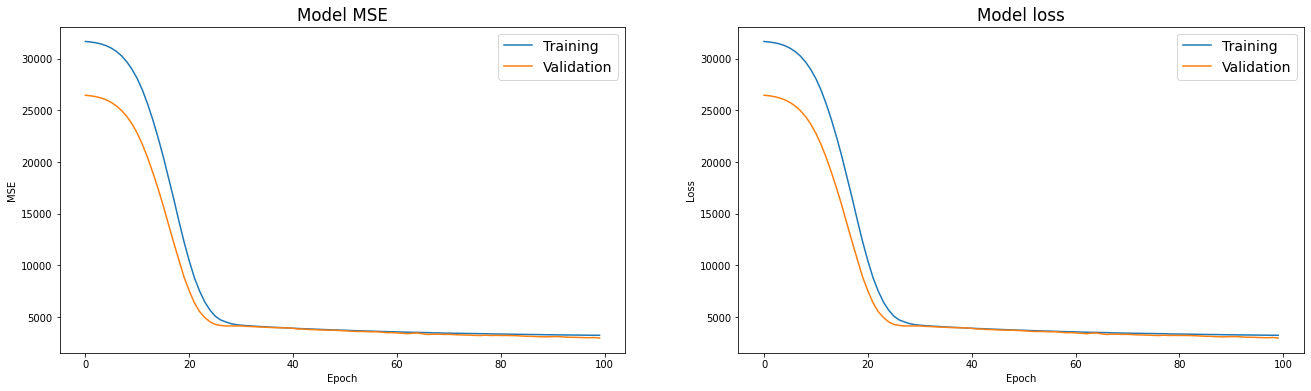

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [25]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

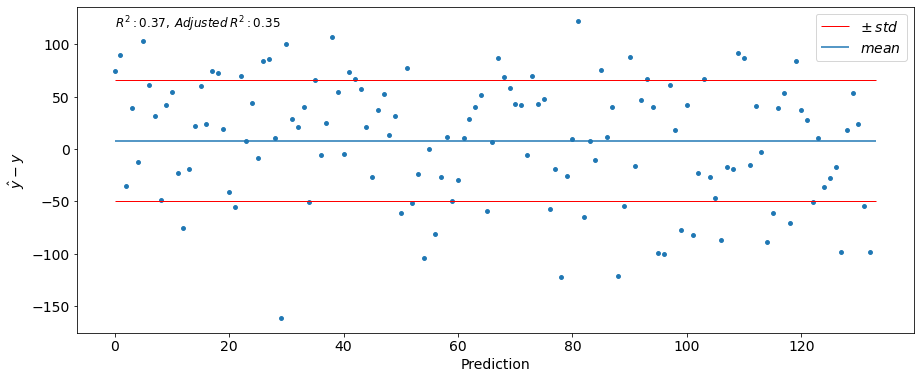

In [26]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()